In [1]:
!pip install librosa

In [2]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('ravdess/Actor_01/03-01-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ria Jha\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


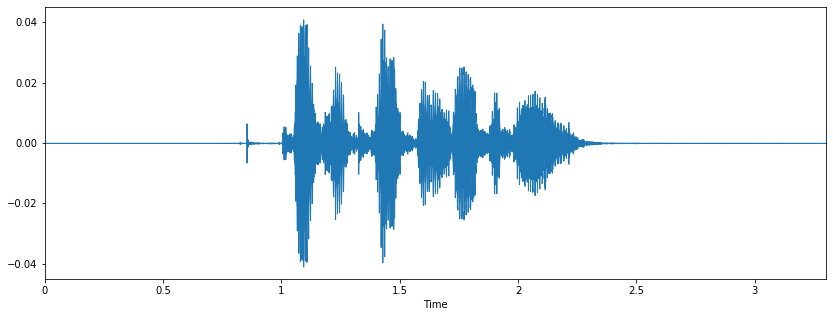

In [3]:
%pylab inline
import os
import pandas as pd
import glob

plt.figure(figsize=(14,5))
librosa.display.waveplot(data, sr = sampling_rate)

In [4]:
path = 'ravdess'
lst = []

for subdir,dirs,files in os.walk(path):
    for file in files:
        try:
            X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            file = int(file[7:8]) - 1
            arr = mfccs, file
            lst.append(arr)
        except ValueError:
            continue

# Output Generation via Confusion Matrix

In [5]:
X, Y = zip(*lst)

In [6]:
import numpy as np
X_ary = np.asarray(X)
Y_ary = np.asarray(Y)

X_ary.shape, Y_ary.shape

((1440, 40), (1440,))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 

# Changing training set size

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size=0.33)
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.64      0.20      0.30        35
           1       0.56      0.85      0.68        67
           2       0.46      0.56      0.50        52
           3       0.48      0.36      0.41        69
           4       0.75      0.66      0.70        67
           5       0.44      0.55      0.49        49
           6       0.71      0.54      0.61        72
           7       0.61      0.69      0.65        65

    accuracy                           0.57       476
   macro avg       0.58      0.55      0.54       476
weighted avg       0.59      0.57      0.56       476



In [70]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.25, random_state = 42) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.36      0.18      0.24        22
           1       0.52      0.88      0.65        56
           2       0.48      0.38      0.43        42
           3       0.59      0.38      0.46        50
           4       0.61      0.62      0.61        50
           5       0.63      0.62      0.62        39
           6       0.49      0.61      0.54        46
           7       0.61      0.49      0.55        55

    accuracy                           0.55       360
   macro avg       0.54      0.52      0.51       360
weighted avg       0.55      0.55      0.54       360



In [74]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.66      0.94      0.78        35
           2       0.71      0.37      0.49        27
           3       0.48      0.46      0.47        26
           4       0.78      0.75      0.76        28
           5       0.52      0.58      0.55        24
           6       0.72      0.70      0.71        37
           7       0.53      0.55      0.54        29

    accuracy                           0.63       216
   macro avg       0.62      0.60      0.60       216
weighted avg       0.63      0.63      0.62       216



# Plot for Accuray vs Training data size

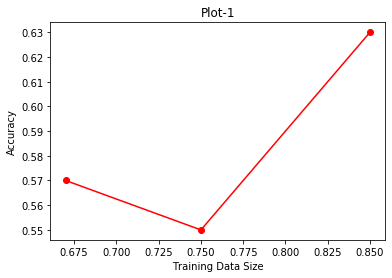

In [124]:
import matplotlib.pyplot as plt
xr = [0.67,0.75,0.85]
yr = [0.57,0.55,0.63]
plt.title('Plot-1')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.plot(xr, yr, '-o', color='r')

# Tuning the best hyperparameters 

In [18]:
#Random Hyperparameter Grid to find the best parameters for the accuracy to improve
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10, 13, 17, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 511, 822, 1133, 1444, 1755, 2066, 2377, 2688, 3000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 7, 10, 13, 17, 20], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [20]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters, first create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 59.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [29]:
#Important hyper-parameters for improving efficiency of RandomForestClassifier() are:
#max_features, max_depth, max_leaf_nodes and n_estimators

# Changing max_features hyperparameter

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="auto", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.67      0.97      0.79        35
           2       0.67      0.30      0.41        27
           3       0.52      0.50      0.51        26
           4       0.74      0.71      0.73        28
           5       0.48      0.46      0.47        24
           6       0.66      0.62      0.64        37
           7       0.50      0.59      0.54        29

    accuracy                           0.61       216
   macro avg       0.60      0.58      0.58       216
weighted avg       0.61      0.61      0.59       216



In [86]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="sqrt", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='sqrt', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.67      0.97      0.79        35
           2       0.67      0.30      0.41        27
           3       0.52      0.50      0.51        26
           4       0.74      0.71      0.73        28
           5       0.48      0.46      0.47        24
           6       0.66      0.62      0.64        37
           7       0.50      0.59      0.54        29

    accuracy                           0.61       216
   macro avg       0.60      0.58      0.58       216
weighted avg       0.61      0.61      0.59       216



In [88]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [89]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.66      0.94      0.78        35
           2       0.71      0.37      0.49        27
           3       0.48      0.46      0.47        26
           4       0.78      0.75      0.76        28
           5       0.52      0.58      0.55        24
           6       0.72      0.70      0.71        37
           7       0.53      0.55      0.54        29

    accuracy                           0.63       216
   macro avg       0.62      0.60      0.60       216
weighted avg       0.63      0.63      0.62       216



# Plot for Accuray vs max_features

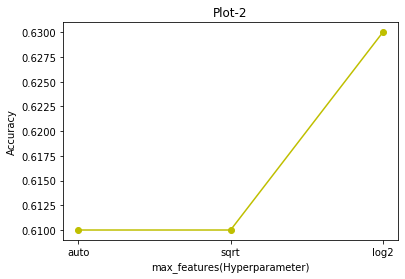

In [125]:
import matplotlib.pyplot as plt
xr = ['auto','sqrt','log2']
yr = [0.61,0.61,0.63]
plt.title('Plot-2')
plt.xlabel('max_features(Hyperparameter)')
plt.ylabel('Accuracy')
plt.plot(xr, yr, '-o', color='y')

# Changing n_estimators (number of trees) hyperparameter

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [91]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.66      0.94      0.78        35
           2       0.71      0.37      0.49        27
           3       0.48      0.46      0.47        26
           4       0.78      0.75      0.76        28
           5       0.52      0.58      0.55        24
           6       0.72      0.70      0.71        37
           7       0.53      0.55      0.54        29

    accuracy                           0.63       216
   macro avg       0.62      0.60      0.60       216
weighted avg       0.63      0.63      0.62       216



In [92]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 1200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [93]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.61      1.00      0.76        35
           2       0.83      0.37      0.51        27
           3       0.54      0.50      0.52        26
           4       0.72      0.75      0.74        28
           5       0.50      0.46      0.48        24
           6       0.69      0.68      0.68        37
           7       0.52      0.59      0.55        29

    accuracy                           0.62       216
   macro avg       0.68      0.58      0.59       216
weighted avg       0.65      0.62      0.61       216



In [95]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 4200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=4200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.62      1.00      0.77        35
           2       0.83      0.37      0.51        27
           3       0.58      0.54      0.56        26
           4       0.70      0.75      0.72        28
           5       0.50      0.42      0.45        24
           6       0.68      0.68      0.68        37
           7       0.50      0.59      0.54        29

    accuracy                           0.62       216
   macro avg       0.68      0.58      0.59       216
weighted avg       0.65      0.62      0.61       216



In [97]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 22000, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=22000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [98]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.62      1.00      0.77        35
           2       0.83      0.37      0.51        27
           3       0.58      0.54      0.56        26
           4       0.69      0.71      0.70        28
           5       0.52      0.46      0.49        24
           6       0.66      0.68      0.67        37
           7       0.52      0.59      0.55        29

    accuracy                           0.62       216
   macro avg       0.68      0.58      0.59       216
weighted avg       0.65      0.62      0.61       216



In [99]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 11000, random_state=5)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=11000,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [100]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.62      1.00      0.77        35
           2       0.83      0.37      0.51        27
           3       0.58      0.54      0.56        26
           4       0.71      0.71      0.71        28
           5       0.52      0.50      0.51        24
           6       0.66      0.68      0.67        37
           7       0.53      0.59      0.56        29

    accuracy                           0.63       216
   macro avg       0.68      0.59      0.59       216
weighted avg       0.66      0.63      0.62       216



In [101]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=100, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 511, random_state=42)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=511,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [102]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.67      1.00      0.80        35
           2       0.85      0.41      0.55        27
           3       0.48      0.54      0.51        26
           4       0.71      0.71      0.71        28
           5       0.57      0.50      0.53        24
           6       0.66      0.62      0.64        37
           7       0.50      0.55      0.52        29

    accuracy                           0.63       216
   macro avg       0.66      0.60      0.61       216
weighted avg       0.65      0.63      0.62       216



# Plot for Accuray vs n_estimators

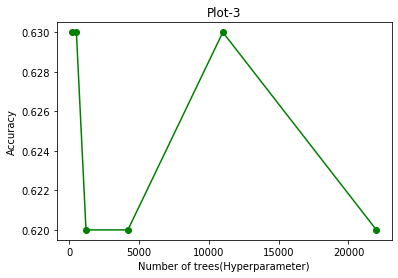

In [128]:
import matplotlib.pyplot as plt
xr = [200, 511, 1200, 4200, 11000, 22000]
yr = [0.63, 0.63, 0.62, 0.62, 0.63, 0.62]
plt.title('Plot-3')
plt.xlabel('Number of trees(Hyperparameter)')
plt.ylabel('Accuracy')
plt.plot(xr, yr, '-o', color='g')

# Changing max_depth hyperparameter

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [107]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.60      1.00      0.75        35
           2       0.58      0.26      0.36        27
           3       0.43      0.38      0.41        26
           4       0.73      0.68      0.70        28
           5       0.48      0.50      0.49        24
           6       0.58      0.49      0.53        37
           7       0.42      0.52      0.46        29

    accuracy                           0.56       216
   macro avg       0.58      0.53      0.53       216
weighted avg       0.56      0.56      0.54       216



In [108]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=30, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [109]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.66      0.94      0.78        35
           2       0.71      0.37      0.49        27
           3       0.48      0.46      0.47        26
           4       0.78      0.75      0.76        28
           5       0.52      0.58      0.55        24
           6       0.72      0.70      0.71        37
           7       0.53      0.55      0.54        29

    accuracy                           0.63       216
   macro avg       0.62      0.60      0.60       216
weighted avg       0.63      0.63      0.62       216



In [110]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=50, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [111]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.66      0.94      0.78        35
           2       0.71      0.37      0.49        27
           3       0.48      0.46      0.47        26
           4       0.78      0.75      0.76        28
           5       0.52      0.58      0.55        24
           6       0.72      0.70      0.71        37
           7       0.53      0.55      0.54        29

    accuracy                           0.63       216
   macro avg       0.62      0.60      0.60       216
weighted avg       0.63      0.63      0.62       216



In [113]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=80, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [114]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.66      0.94      0.78        35
           2       0.71      0.37      0.49        27
           3       0.48      0.46      0.47        26
           4       0.78      0.75      0.76        28
           5       0.52      0.58      0.55        24
           6       0.72      0.70      0.71        37
           7       0.53      0.55      0.54        29

    accuracy                           0.63       216
   macro avg       0.62      0.60      0.60       216
weighted avg       0.63      0.63      0.62       216



In [115]:
x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size = 0.15, random_state = 50) 
rd_forest = RandomForestClassifier(criterion="gini", max_depth=15, max_features="log2", max_leaf_nodes=1000, min_samples_leaf=3, min_samples_split=4, n_estimators= 200, random_state=0)
rd_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='log2', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [116]:
Predictions = rd_forest.predict(x_test)
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.63      0.97      0.76        35
           2       0.77      0.37      0.50        27
           3       0.50      0.46      0.48        26
           4       0.70      0.75      0.72        28
           5       0.50      0.50      0.50        24
           6       0.68      0.62      0.65        37
           7       0.50      0.55      0.52        29

    accuracy                           0.61       216
   macro avg       0.61      0.57      0.57       216
weighted avg       0.62      0.61      0.59       216



# Plot for Accuray vs max_depth

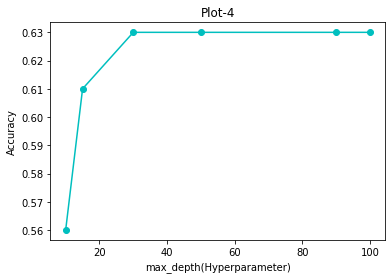

In [129]:
import matplotlib.pyplot as plt
xr = [10,15,30,50,90,100]
yr = [0.56, 0.61, 0.63, 0.63, 0.63, 0.63]
plt.title('Plot-4')
plt.xlabel('max_depth(Hyperparameter)')
plt.ylabel('Accuracy')
plt.plot(xr, yr, '-o', color='c')